# City Bike Views

Based on the data available at [Divvy Data](https://www.divvybikes.com/system-data), some ways to look at the data.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## The data

[Divvy Data](https://www.divvybikes.com/system-data) publishes a sample of the data. 

In [3]:
from pyensae.datasource import download_data
file = download_data("Divvy_Trips_2016_Q3Q4.zip", url="https://s3.amazonaws.com/divvy-data/tripdata/")

In [4]:
import pandas
stations = pandas.read_csv("Divvy_Stations_2016_Q3.csv")
bikes = pandas.concat([pandas.read_csv("Divvy_Trips_2016_Q3.csv"),
                       pandas.read_csv("Divvy_Trips_2016_Q4.csv")])

In [5]:
bikes.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,12150160,9/30/2016 23:59:58,10/1/2016 00:04:03,4959,245,69,Damen Ave & Pierce Ave,17,Wood St & Division St,Subscriber,Male,1988.0
1,12150159,9/30/2016 23:59:58,10/1/2016 00:04:09,2589,251,383,Ashland Ave & Harrison St,320,Loomis St & Lexington St,Subscriber,Female,1990.0
2,12150158,9/30/2016 23:59:51,10/1/2016 00:24:51,3656,1500,302,Sheffield Ave & Wrightwood Ave,334,Lake Shore Dr & Belmont Ave,Customer,NaN,NaN
3,12150157,9/30/2016 23:59:51,10/1/2016 00:03:56,3570,245,475,Washtenaw Ave & Lawrence Ave,471,Francisco Ave & Foster Ave,Subscriber,Female,1988.0
4,12150156,9/30/2016 23:59:32,10/1/2016 00:26:50,3158,1638,302,Sheffield Ave & Wrightwood Ave,492,Leavitt St & Addison St,Customer,NaN,NaN


## About age

In [6]:
from datetime import datetime, time
df = bikes
df["dtstart"] = pandas.to_datetime(df.starttime, infer_datetime_format=True)
df["dtstop"] = pandas.to_datetime(df.stoptime, infer_datetime_format=True)
df["stopday"] = df.dtstop.apply(lambda r: datetime(r.year, r.month, r.day))
df["stoptime"] = df.dtstop.apply(lambda r: time(r.hour, r.minute, 0))
df["stoptime10"] = df.dtstop.apply(lambda r: time(r.hour, (r.minute // 10)*10, 0))  # every 10 minutes
df['stopweekday'] = df['dtstop'].dt.dayofweek

In [7]:
df['duration'] = df["dtstop"] -  df["dtstart"]
df["age"] = - df["birthyear"] + 2016
df['duration_sec'] = df['duration'].apply(lambda x: x.total_seconds())

In [8]:
df["stoptime_sec"] = df.dtstop.apply(lambda r: r.hour * 60 + r.minute)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_id,2.12564e+06,1.16993e+07,731388,1.04267e+07,1.10663e+07,1.17015e+07,1.23313e+07,1.29792e+07
bikeid,2.12564e+06,3251.98,1730.44,1,1755,3446,4802,5920
tripduration,2.12564e+06,1008.55,1816.1,60,416,716,1195,86365
from_station_id,2.12564e+06,179.916,130.524,2,75,157,268,620
to_station_id,2.12564e+06,180.352,130.488,2,75,157,272,620
birthyear,1.59034e+06,1980.79,10.754,1899,1975,1984,1989,2000
stopweekday,2.12564e+06,2.95275,2.02016,0,1,3,5,6
duration,2125643,0 days 00:16:48.183487,0 days 00:30:15.597468,0 days 00:00:59,0 days 00:06:56,0 days 00:11:56,0 days 00:19:55,0 days 23:59:24
age,1.59034e+06,35.2129,10.754,16,27,32,41,117
duration_sec,2.12564e+06,1008.18,1815.6,59,416,716,1195,86364


In [10]:
df.shape

(2125643, 21)

We take a random sample.

In [11]:
import random
ens = pandas.Series([random.randint(0,99) for i in range(df.shape[0])])
sample = df[ens==0]

c:\python370_x64\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
sample.shape
sample = sample[(sample.age < 100) & (sample.duration_sec < 3600)]

c:\python370_x64\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\python370_x64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


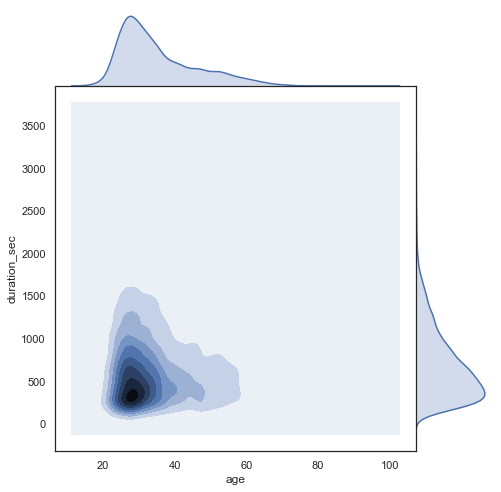

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
g = sns.jointplot(sample.age, sample.duration_sec, kind="kde", size=7, space=0)

c:\python370_x64\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\python370_x64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


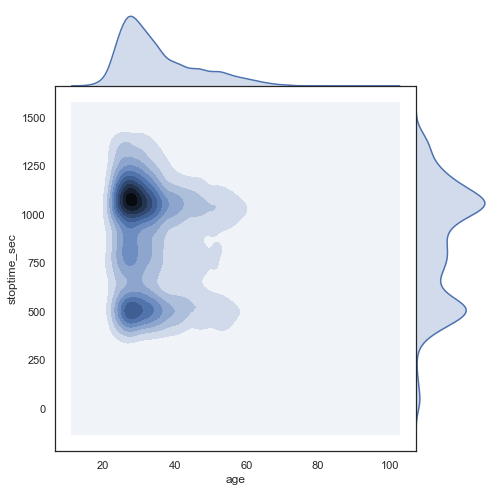

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
g = sns.jointplot(sample.age, sample.stoptime_sec, kind="kde", size=7, space=0)

The duration seems correlated to the age. Let's see. Younger people during the weekend are more active and bike longer.

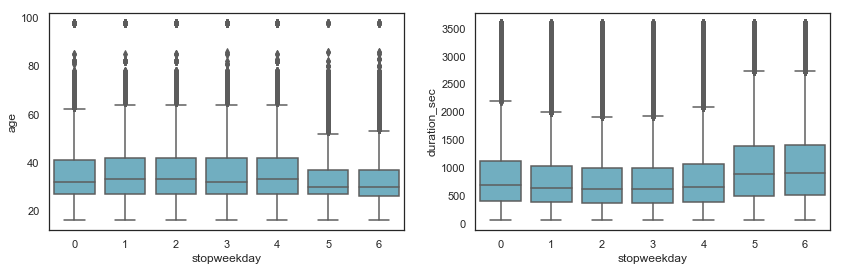

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.boxplot(x="stopweekday", y="age", data=df[df.age < 100], color="c", ax=ax[0])
sns.boxplot(x="stopweekday", y="duration_sec", data=df[df.duration_sec < 3600], color="c", ax=ax[1]);

However, linear correlations are not so great.

In [16]:
df.corr()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear,stopweekday,age,duration_sec,stoptime_sec
trip_id,1.000000,-0.025039,-0.071566,0.008129,0.005505,-0.035032,-0.067585,0.035032,-0.071514,-0.063709
bikeid,-0.025039,1.000000,0.001088,0.009959,0.009538,-0.010901,0.000779,0.010901,0.001090,-0.007245
tripduration,-0.071566,0.001088,1.000000,-0.008972,-0.004730,-0.009788,0.069885,0.009788,0.999969,0.034435
from_station_id,0.008129,0.009959,-0.008972,1.000000,0.386314,0.019982,0.019426,-0.019982,-0.008970,-0.016486
to_station_id,0.005505,0.009538,-0.004730,0.386314,1.000000,0.021198,0.011177,-0.021198,-0.004734,0.061833
birthyear,-0.035032,-0.010901,-0.009788,0.019982,0.021198,1.000000,0.057081,-1.000000,-0.009808,0.085929
stopweekday,-0.067585,0.000779,0.069885,0.019426,0.011177,0.057081,1.000000,-0.057081,0.069848,0.017866
age,0.035032,0.010901,0.009788,-0.019982,-0.021198,-1.000000,-0.057081,1.000000,0.009808,-0.085929
duration_sec,-0.071514,0.001090,0.999969,-0.008970,-0.004734,-0.009808,0.069848,0.009808,1.000000,0.034514
stoptime_sec,-0.063709,-0.007245,0.034435,-0.016486,0.061833,0.085929,0.017866,-0.085929,0.034514,1.000000


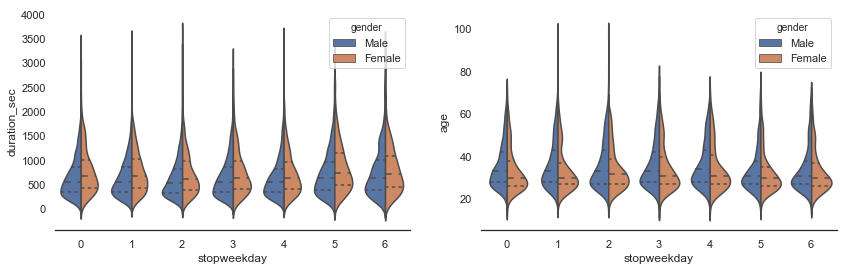

In [17]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.violinplot(x="stopweekday", y="duration_sec", hue="gender", data=sample, split=True, inner="quart", ax=ax[0])
sns.violinplot(x="stopweekday", y="age", hue="gender", data=sample, split=True, inner="quart", ax=ax[1])
sns.despine(left=True);

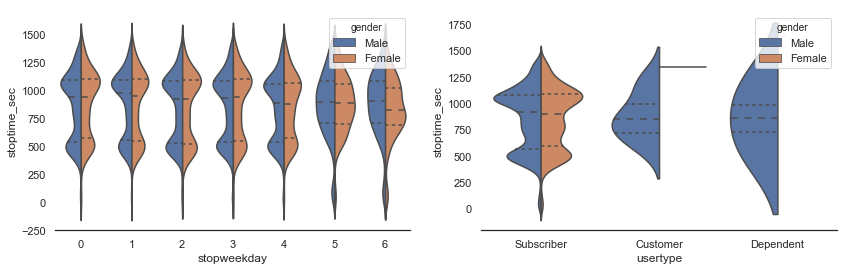

In [18]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.violinplot(x="stopweekday", y="stoptime_sec", hue="gender", data=sample, split=True, inner="quart", ax=ax[0])
sns.violinplot(x="usertype", y="stoptime_sec", hue="gender", data=sample, split=True, inner="quart", ax=ax[1])
sns.despine(left=True);

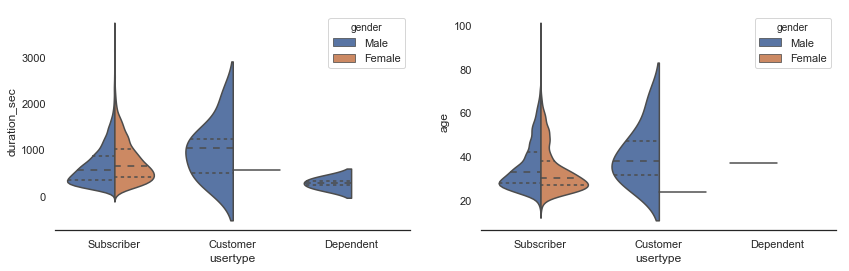

In [19]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.violinplot(x="usertype", y="duration_sec", hue="gender", data=sample, split=True, inner="quart", ax=ax[0])
sns.violinplot(x="usertype", y="age", hue="gender", data=sample, split=True, inner="quart", ax=ax[1])
sns.despine(left=True);

## Non-linear correlations

We apply the following [Corrélations non linéaires](http://www.xavierdupre.fr/app/mlstatpy/helpsphinx/notebooks/correlation_non_lineaire.html#overfitting).

In [20]:
sample2 = sample.copy()
sample2["age_inv"] = sample2.age ** -1
sample2["gender_num"] = sample2.gender.apply(lambda x: (1 if x == "Male" else 0))
sample2["usertype_num"] = sample2.usertype.apply(lambda x: (1 if x == "Subscriber" else 0))
sample2.corr()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear,stopweekday,age,duration_sec,stoptime_sec,age_inv,gender_num,usertype_num
trip_id,1.000000,-0.020790,-0.090476,-0.000107,-0.013945,-0.032304,-0.044524,0.032304,-0.089994,-0.050106,-0.027614,0.058240,0.014886
bikeid,-0.020790,1.000000,0.011953,0.009183,0.013776,-0.011606,-0.001548,0.011606,0.011944,-0.004755,-0.009776,0.031241,-0.000271
tripduration,-0.090476,0.011953,1.000000,0.044958,0.050456,-0.005926,0.063156,0.005926,0.999999,0.073529,-0.016003,-0.108492,-0.008061
from_station_id,-0.000107,0.009183,0.044958,1.000000,0.381516,0.021112,0.051470,-0.021112,0.044957,-0.010079,0.029148,-0.027132,0.019338
to_station_id,-0.013945,0.013776,0.050456,0.381516,1.000000,0.027436,0.049334,-0.027436,0.050440,0.089843,0.033983,-0.031992,0.014013
birthyear,-0.032304,-0.011606,-0.005926,0.021112,0.027436,1.000000,0.047890,-1.000000,-0.005937,0.090793,0.951178,-0.080894,0.008748
stopweekday,-0.044524,-0.001548,0.063156,0.051470,0.049334,0.047890,1.000000,-0.047890,0.063146,-0.005645,0.052167,-0.043754,-0.009274
age,0.032304,0.011606,0.005926,-0.021112,-0.027436,-1.000000,-0.047890,1.000000,0.005937,-0.090793,-0.951178,0.080894,-0.008748
duration_sec,-0.089994,0.011944,0.999999,0.044957,0.050440,-0.005937,0.063146,0.005937,1.000000,0.073511,-0.016010,-0.108476,-0.008063
stoptime_sec,-0.050106,-0.004755,0.073529,-0.010079,0.089843,0.090793,-0.005645,-0.090793,0.073511,1.000000,0.091370,-0.003124,-0.005995


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import numpy

def correlation_cross_val(df, model, draws=5, **params):
    cor = df.corr()    
    df = scale(df[cor.columns])
    for i in range(cor.shape[0]):
        xi = df[:, i:i+1]
        for j in range(cor.shape[1]):
            xj = df[:, j]
            mem = []
            for k in range(0, draws):
                xi_train, xi_test, xj_train, xj_test = train_test_split(xi, xj, train_size=0.5)
                mod = model(**params)
                mod.fit(xi_train, xj_train)
                v = mod.predict(xi_test)
                c = (1 - numpy.var(v - xj_test))
                mem.append(max(c, 0) **0.5)
            cor.iloc[i,j] = sum(mem) / len(mem)
    return cor

from sklearn.tree import DecisionTreeRegressor
cor = correlation_cross_val(sample2, DecisionTreeRegressor, draws=20)
cor

c:\python370_x64\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear,stopweekday,age,duration_sec,stoptime_sec,age_inv,gender_num,usertype_num
trip_id,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990057,0.000000,0.000000,0.878676,0.000000,0.000000,0.015071
bikeid,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017745
tripduration,0.000000,0.000000,0.999990,0.000000,0.000000,0.000000,0.000000,0.000000,0.999990,0.000000,0.000000,0.000000,0.099688
from_station_id,0.000000,0.000000,0.054325,0.999999,0.536015,0.008031,0.000000,0.006133,0.044061,0.012246,0.028895,0.000000,0.172352
to_station_id,0.000000,0.000000,0.109784,0.532589,0.999999,0.026304,0.000000,0.024202,0.105040,0.248720,0.019269,0.000000,0.153788
birthyear,0.011917,0.005125,0.058987,0.026033,0.034188,0.999965,0.006681,0.999942,0.053868,0.055993,0.999996,0.068499,0.209815
stopweekday,0.042561,0.020920,0.079774,0.065344,0.045880,0.085778,1.000000,0.055188,0.074982,0.033219,0.095588,0.054960,0.291366
age,0.011934,0.006577,0.051631,0.019733,0.028614,0.999909,0.017197,0.999943,0.063061,0.052308,0.999997,0.055599,0.332540
duration_sec,0.000000,0.000000,0.999991,0.000000,0.000000,0.000000,0.000000,0.000000,0.999992,0.000000,0.000000,0.000000,0.026094
stoptime_sec,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.114911


*from_station_id* and *start_station_id* seem related. Which means there is frequent trip. Funny, the trip id can explain the stopping time... It should be removed from any dataset.

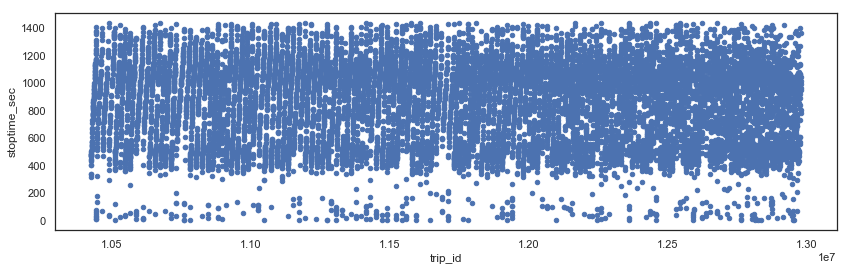

In [22]:
sample2.plot(x="trip_id", y="stoptime_sec", kind="scatter", figsize=(14,4));